我們認真的來做一下數據分析!

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 準備模擬的資料

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [32]:
x = np.linspace(0, 5, 50)

畫出圖形來。

In [33]:
y = 1.2*x + 0.8

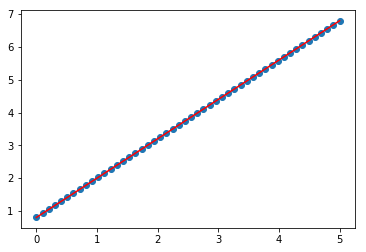

In [34]:
plt.scatter(x,y)
plt.plot(x, y, 'r')

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [35]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

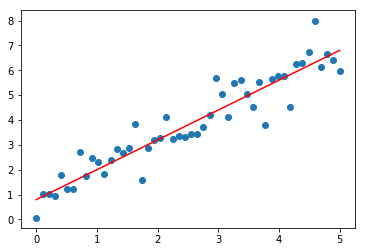

In [36]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做, 嗯, 線性迴歸。

In [37]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [38]:
y

array([0.07374832, 1.03449785, 1.01335826, 0.92909092, 1.77177763,
       1.22126416, 1.20311328, 2.71113602, 1.749614  , 2.47417623,
       2.31183754, 1.80684217, 2.38368879, 2.83274763, 2.68236413,
       2.88327729, 3.82715887, 1.56667396, 2.85436537, 3.18471223,
       3.26712863, 4.10922745, 3.22081239, 3.36259754, 3.33107756,
       3.45164053, 3.4483663 , 3.72051309, 4.21282491, 5.67588094,
       5.03683974, 4.10797089, 5.49612265, 5.59975137, 5.05287152,
       4.5072951 , 5.50894339, 3.78291058, 5.62912575, 5.77919444,
       5.75290022, 4.50402025, 6.2511031 , 6.27325019, 6.73261879,
       7.99827628, 6.11191865, 6.66080318, 6.41845268, 5.96990783])

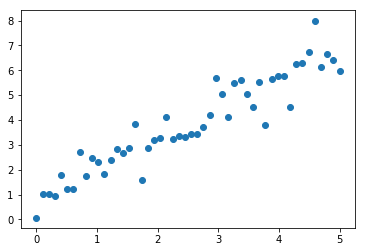

In [39]:
plt.scatter(x,y)

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regr = LinearRegression()

In [42]:
X = x.reshape(50,1)

In [43]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
Y = regr.predict(X)

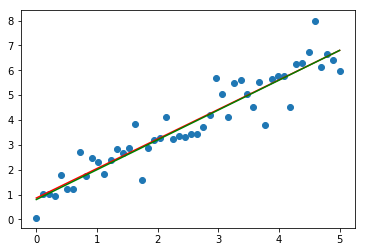

In [45]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.2*x + 0.8, 'g')

# `scikit-learn` 套件

讀入我們學過的 `LinearRegression` 做線性回歸, 還有 `train_test_split` 分訓練、測試資料。

## `scikit-learn` 真實世界數據

`scikit-learn` 內建一些真實世界的數據, 可以讓你玩玩, 他們稱做 "Toy Datasets"。有哪些可以參考 [scikit-learn 官網](http://scikit-learn.org/stable/datasets/index.html)的說明。

#### 讀入 boston 房價數據

In [46]:
from sklearn.datasets import load_boston

In [47]:
boston = load_boston()

## 資料裡到底有什麼

#### features

你可以用 `feature_names` 看到數據中所有的 features。你才發現原來有 13 個 features!

In [48]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
X = boston.data
Y = boston.target

In [50]:
len(X)

506

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=87)

In [52]:
regr = LinearRegression()

In [53]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_predict = regr.predict(x_test)

Text(0,0.5,'Predicted Price')

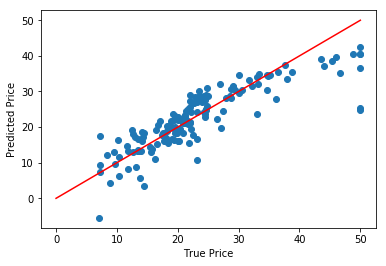

In [55]:
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50],'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

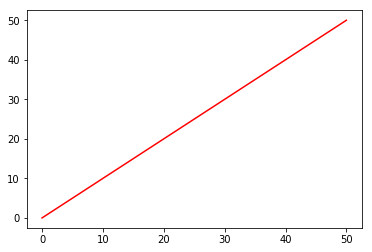

In [56]:
plt.plot([0,50],[0,50],'r')

# Mean squared error

In [57]:
mean_squared_error(y_test, y_predict)

26.586786269535835

# R² score, the coefficient of determination

In [58]:
r2_score(y_test, y_predict) 

0.7335556099523537

#### 解釋數據內容

你也可以用

``` py
print(boston.DESCR)
```

看看完整的解釋。

In [59]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### [小技巧] 善用 `enumerate`

In [60]:
L = ['a', 'b', 'c']

In [61]:
for i in L:
    print(i)

a
b
c


In [62]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [63]:
list(enumerate(L))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [64]:
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [65]:
for i, s in enumerate(L):
    print(i+1, s)

1 a
2 b
3 c


#### [小技巧] 畫多個圖

In [66]:
x = np.linspace(-10,10,200)

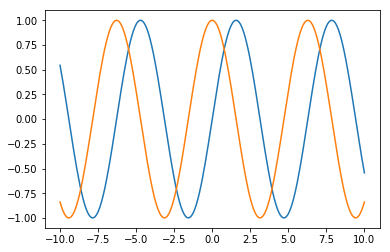

In [67]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

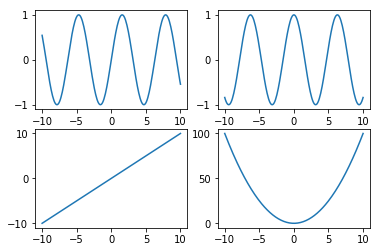

In [68]:
plt.subplot(2,2,1)
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)
plt.plot(x, np.cos(x))

plt.subplot(2,2,3)
plt.plot(x, x)

plt.subplot(2,2,4)
plt.plot(x, x**2)

#由左至右，由上而下

#### 畫出個別參數和 target 關係

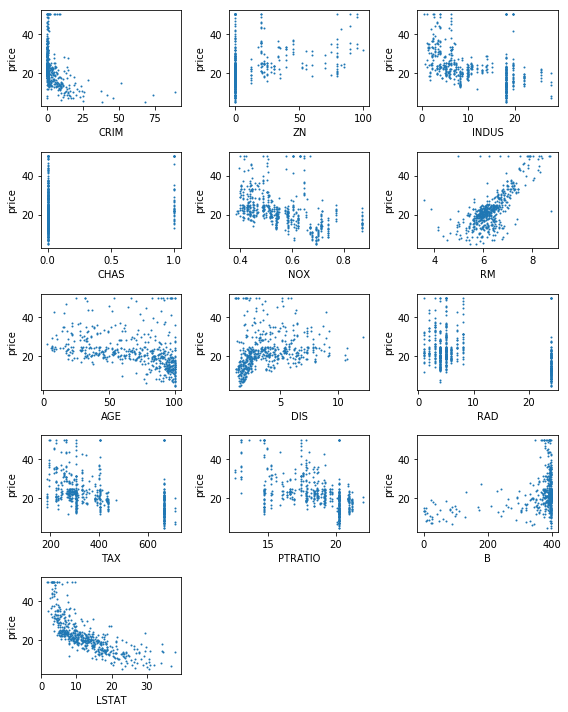

In [69]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel("price")
    plt.xlabel(feature)
    plt.tight_layout()